In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [2]:
housing_df = pd.read_csv(Path('Resources/clean_housing.csv'))
housing_df.head()

,period_begin,period_end,state,property_type,median_sale_price,homes_sold
0,2020-11-01,2020-11-30,Illinois,All Residential,240700,13675
1,2019-07-01,2019-07-31,Connecticut,Single Family Residential,310900,3920
2,2016-11-01,2016-11-30,Illinois,Condo/Co-op,196800,1970
3,2013-02-01,2013-02-28,Kansas,Single Family Residential,147600,1150
4,2020-02-01,2020-02-29,Virginia,Multi-Family (2-4 Unit),217900,67


In [3]:
# redFin_df = pd.read_csv("Resources/state_market_tracker.tsv000", sep = '\t', header = 0)
# pd.set_option('display.max_columns', None)
# redFin_df.head()

In [4]:
# set state names as index
#housing_df.set_index('state', inplace=True)
#housing_df

In [5]:
#housing_df["parent_metro_region"] = redFin_df['parent_metro_region'].copy()
#housing_df

In [6]:
#housing_df = pd.get_dummies(housing_df, columns=['property_type'])
#housing_df.head(10)

In [7]:
#housing_df['period_begin'] = pd.to_datetime(housing_df['period_begin'], infer_datetime_format = True)
#housing_df

In [8]:
# drop columns
new_housing_df = housing_df.drop(["period_end","property_type"],axis=1)
new_housing_df.head()

,period_begin,state,median_sale_price,homes_sold
0,2020-11-01,Illinois,240700,13675
1,2019-07-01,Connecticut,310900,3920
2,2016-11-01,Illinois,196800,1970
3,2013-02-01,Kansas,147600,1150
4,2020-02-01,Virginia,217900,67


In [9]:
# change period began to only year 
#new_housing_df['period_begin'] = pd.to_datetime(housing_df['period_begin']).dt.strftime('%Y')
#new_housing_df

In [10]:
# rename 'period began' with 'year'
new_housing_df = new_housing_df.rename({'period_begin':'year'}, axis='columns')
new_housing_df.head(15)

,year,state,median_sale_price,homes_sold
0,2020-11-01,Illinois,240700,13675
1,2019-07-01,Connecticut,310900,3920
2,2016-11-01,Illinois,196800,1970
3,2013-02-01,Kansas,147600,1150
4,2020-02-01,Virginia,217900,67
5,2014-09-01,Maine,144600,486
6,2014-01-01,Nebraska,150700,73
7,2017-05-01,Connecticut,170600,267
8,2019-04-01,Colorado,645400,59
9,2016-11-01,Virginia,298100,8206


In [11]:
new_housing_df['year'] = pd.to_datetime(new_housing_df['year'], infer_datetime_format = True)
new_housing_df

,year,state,median_sale_price,homes_sold
0,2020-11-01,Illinois,240700,13675
1,2019-07-01,Connecticut,310900,3920
2,2016-11-01,Illinois,196800,1970
3,2013-02-01,Kansas,147600,1150
4,2020-02-01,Virginia,217900,67
...,...,...,...,...
28970,2021-10-01,Hawaii,1591000,21
28971,2015-08-01,Georgia,158200,662
28972,2013-11-01,Maine,147400,370
28973,2016-12-01,Oregon,312600,4511


In [12]:
migration_df = pd.read_csv(Path('Resources/clean_migration.csv'))
migration_df.head()

,current_state,year,population,from,from_different_state_Total
0,Alabama,2010,4729509,Alabama,108723
1,Alaska,2010,702974,Alabama,36326
2,Arizona,2010,6332786,Alabama,222725
3,Arkansas,2010,2888304,Alabama,79127
4,California,2010,36907897,Alabama,444749


In [13]:
migration_df.dtypes

current_state                 object
year                           int64
population                     int64
from                          object
from_different_state_Total     int64
dtype: object

In [14]:
migration_df['year'] = pd.to_datetime(migration_df['year'].astype(str), format='%Y')

migration_df

,current_state,year,population,from,from_different_state_Total
0,Alabama,2010-01-01,4729509,Alabama,108723
1,Alaska,2010-01-01,702974,Alabama,36326
2,Arizona,2010-01-01,6332786,Alabama,222725
3,Arkansas,2010-01-01,2888304,Alabama,79127
4,California,2010-01-01,36907897,Alabama,444749
...,...,...,...,...,...
28075,Washington,2019-01-01,7527366,abroad_ForeignCountry,231956
28076,West Virginia,2019-01-01,1773280,abroad_ForeignCountry,39548
28077,Wisconsin,2019-01-01,5760481,abroad_ForeignCountry,107973
28078,Wyoming,2019-01-01,572884,abroad_ForeignCountry,30247


In [15]:
# set state as index
#migration_df.set_index('current_state', inplace=True)
#migration_df

In [16]:
new_migation = migration_df.drop(['from'],axis=1)
new_migation

,current_state,year,population,from_different_state_Total
0,Alabama,2010-01-01,4729509,108723
1,Alaska,2010-01-01,702974,36326
2,Arizona,2010-01-01,6332786,222725
3,Arkansas,2010-01-01,2888304,79127
4,California,2010-01-01,36907897,444749
...,...,...,...,...
28075,Washington,2019-01-01,7527366,231956
28076,West Virginia,2019-01-01,1773280,39548
28077,Wisconsin,2019-01-01,5760481,107973
28078,Wyoming,2019-01-01,572884,30247


In [17]:
new_housing_df.to_csv(r'Resources/new_housing_df.csv', index = False)
print(new_housing_df.dtypes)

year                 datetime64[ns]
state                        object
median_sale_price             int64
homes_sold                    int64
dtype: object


In [29]:
new_migation.to_csv(r'Resources/new_migation.csv', index = False)
print(new_migation.dtypes)

current_state                         object
year                          datetime64[ns]
population                             int64
from_different_state_Total             int64
dtype: object


In [19]:
merged_df = pd.merge(new_housing_df, new_migation, how='outer', on='year')
merged_df

,year,state,median_sale_price,homes_sold,current_state,population,from_different_state_Total
0,2020-11-01,Illinois,240700.0,13675.0,NaN,NaN,NaN
1,2020-11-01,Maine,275500.0,2168.0,NaN,NaN,NaN
2,2020-11-01,Minnesota,192200.0,271.0,NaN,NaN,NaN
3,2020-11-01,California,657500.0,34986.0,NaN,NaN,NaN
4,2020-11-01,Missouri,171200.0,81.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
5182624,2011-01-01,NaN,NaN,NaN,Washington,6748474.0,208507.0
5182625,2011-01-01,NaN,NaN,NaN,West Virginia,1836614.0,50068.0
5182626,2011-01-01,NaN,NaN,NaN,Wisconsin,5647213.0,109439.0
5182627,2011-01-01,NaN,NaN,NaN,Wyoming,561389.0,30651.0


In [20]:
joined_df = new_housing_df.set_index('year').join(new_migation.set_index('year'))
joined_df

,state,median_sale_price,homes_sold,current_state,population,from_different_state_Total
year,,,,,,
2012-01-01,West Virginia,107000,14,Alabama,4764428.0,104600.0
2012-01-01,West Virginia,107000,14,Alaska,721186.0,33415.0
2012-01-01,West Virginia,107000,14,Arizona,6468907.0,232457.0
2012-01-01,West Virginia,107000,14,Arkansas,2912680.0,76948.0
2012-01-01,West Virginia,107000,14,California,37572738.0,493641.0
...,...,...,...,...,...,...
2022-05-01,Massachusetts,542900,687,NaN,NaN,NaN
2022-05-01,Kansas,286000,39,NaN,NaN,NaN
2022-05-01,Utah,742900,52,NaN,NaN,NaN


In [21]:
concat_df = pd.concat([new_housing_df,new_migation])
concat_df

,year,state,median_sale_price,homes_sold,current_state,population,from_different_state_Total
0,2020-11-01,Illinois,240700.0,13675.0,NaN,NaN,NaN
1,2019-07-01,Connecticut,310900.0,3920.0,NaN,NaN,NaN
2,2016-11-01,Illinois,196800.0,1970.0,NaN,NaN,NaN
3,2013-02-01,Kansas,147600.0,1150.0,NaN,NaN,NaN
4,2020-02-01,Virginia,217900.0,67.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
28075,2019-01-01,NaN,NaN,NaN,Washington,7527366.0,231956.0
28076,2019-01-01,NaN,NaN,NaN,West Virginia,1773280.0,39548.0
28077,2019-01-01,NaN,NaN,NaN,Wisconsin,5760481.0,107973.0
28078,2019-01-01,NaN,NaN,NaN,Wyoming,572884.0,30247.0


In [22]:
merged_df.nunique()

year                           127
state                           48
median_sale_price             5502
homes_sold                    7825
current_state                   52
population                     520
from_different_state_Total     519
dtype: int64

In [23]:
X = new_housing_df.homes_sold.values.reshape(-1, 1)
y = new_housing_df.median_sale_price

In [24]:
# Splitting into Train and Test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [25]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [26]:
y_pred = model.predict(X)
print(y_pred.shape)

(28975,)


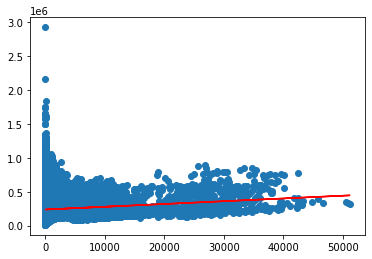

In [27]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [28]:
print(model.coef_)
print(model.intercept_)

[4.07092343]
237536.77866546658
